<a href="https://colab.research.google.com/github/kdmwangi/Data-Science/blob/main/mushroom_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC



load the dataset

In [ ]:
dataset = pd.read_csv('mushrooms.csv', header=1)

data exploration

In [ ]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# veil-type column is standard on both classes
dataset['veil-type'].nunique()

1

In [ ]:
dataset['cap-color'].nunique()

10

In [ ]:
dataset.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [ ]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
# there are two distinct classes ie binary class
dataset.value_counts('class')

class
e    4208
p    3916
dtype: int64

In [ ]:
dataset.shape

(8124, 23)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Data cleaning

In [ ]:
# check for NaN values
dataset.isna().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [ ]:
# check for duplicates
dataset.duplicated().any()

False

Data Preprocessing

In [ ]:
# above data will have to be encoded using a tranformer  and maybe scaled
# for encoding will use the LabelEncoder constructor from sklearn.preprocessing
# machine learning model can understand the string values therefore we will need to encode before training our model
# LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in dataset.columns:
  dataset[col] = encoder.fit_transform(dataset[col])

In [ ]:
dataset['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [ ]:
dataset.iloc[0]

class                       1
cap-shape                   5
cap-surface                 2
cap-color                   4
bruises                     1
odor                        6
gill-attachment             1
gill-spacing                0
gill-size                   1
gill-color                  4
stalk-shape                 0
stalk-root                  3
stalk-surface-above-ring    2
stalk-surface-below-ring    2
stalk-color-above-ring      7
stalk-color-below-ring      7
veil-color                  2
ring-number                 1
ring-type                   4
spore-print-color           2
population                  3
habitat                     5
Name: 0, dtype: int64

Data Visualization

[Text(0.5, 1.0, 'number of mushrooms per class')]

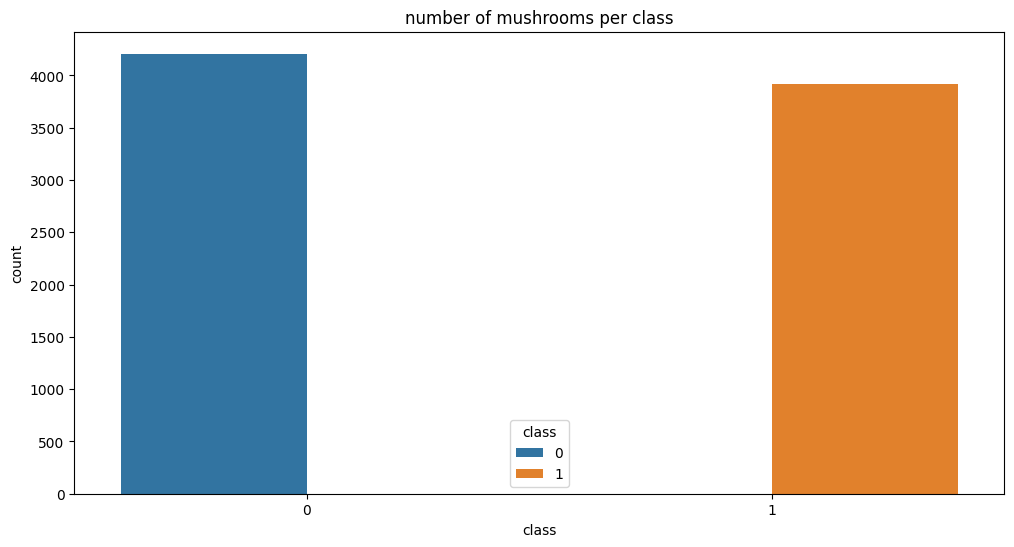

In [ ]:
# visual representation of the classes
plt.figure(figsize=(12,6))
fig = sns.countplot(dataset, x='class', hue='class')
fig.set(title='number of mushrooms per class')

In [ ]:
# plot correlation heatmap of the new dataset

dataset.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [ ]:
# drop veil-type column
dataset = dataset.drop(columns=['veil-type'], axis=1)

[Text(0.5, 1.0, 'Correlation with the features')]

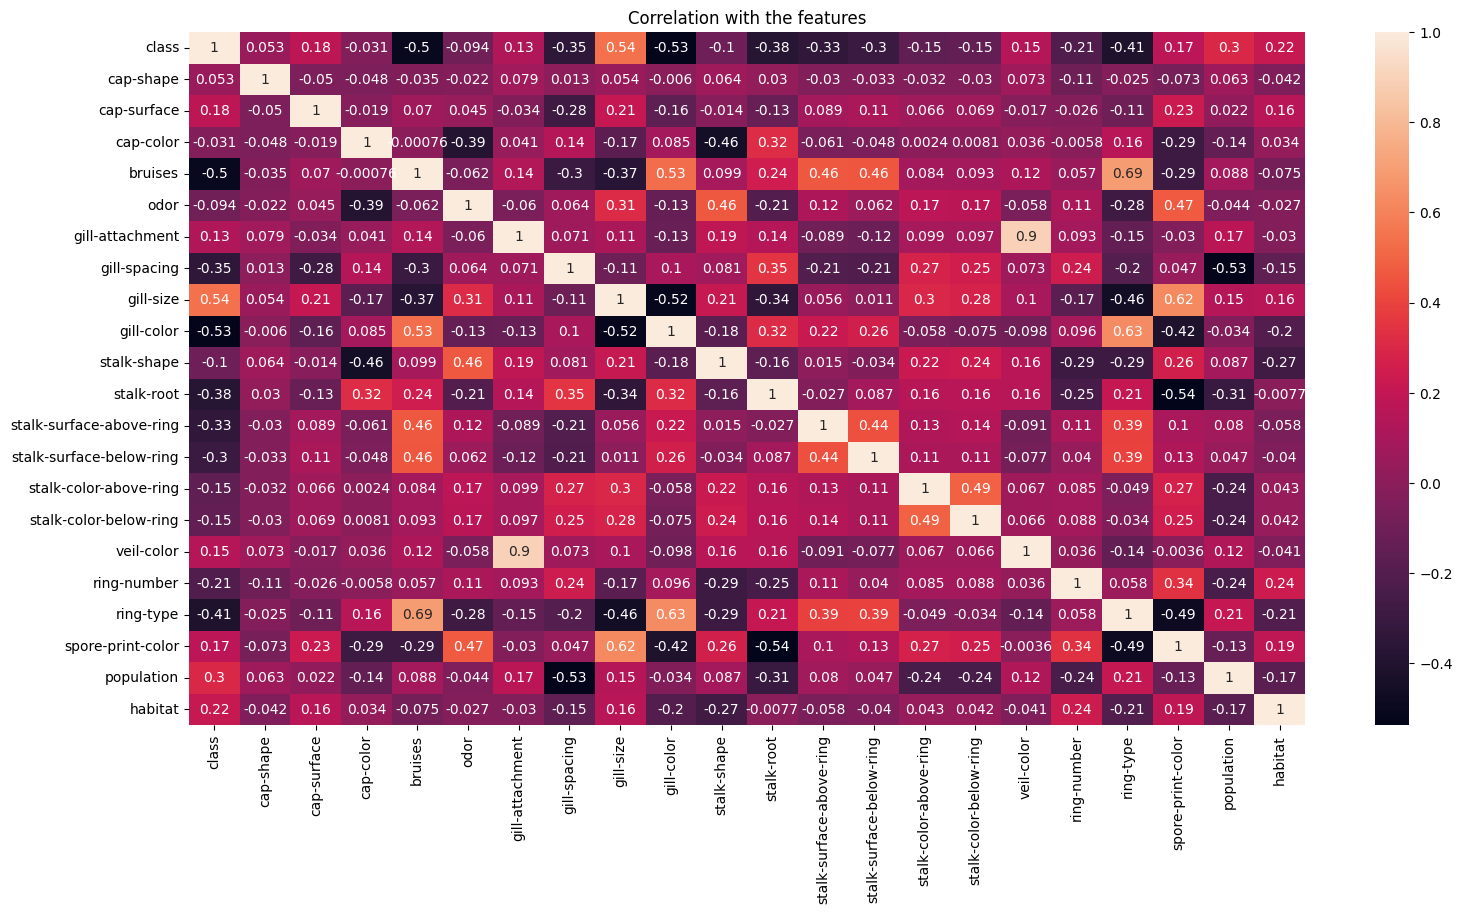

In [ ]:
plt.figure(figsize=(18,9))
fig = sns.heatmap(dataset.corr(), annot=True)
fig.set(title='Correlation with the features')

the correlation heatmap shows a strong negative relationship between bruises, gill-spacing, gill-color and ring-type.


What this actually means is as the value reduces for the columns there is a higher chance that the class will be 1

class 1 in this case being class p

In [ ]:
dataset[dataset['class'] == 1][['bruises', 'class']][400:]

,bruises,class
3313,0,1
3322,0,1
3323,0,1
3326,0,1
3327,0,1
...,...,...
8114,0,1
8116,0,1
8117,0,1
8118,0,1


In [ ]:
dataset['gill-color'].nunique()

12

In [ ]:
dataset.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

<Axes: xlabel='stalk-surface-above-ring', ylabel='stalk-surface-below-ring'>

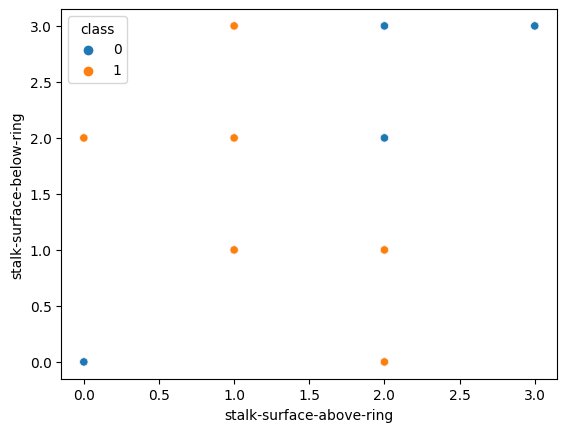

In [ ]:
# create a scatterplot of the two classes

sns.scatterplot(data=dataset, x='stalk-surface-above-ring', y='stalk-surface-below-ring', hue='class')

<Axes: xlabel='gill-color', ylabel='cap-color'>

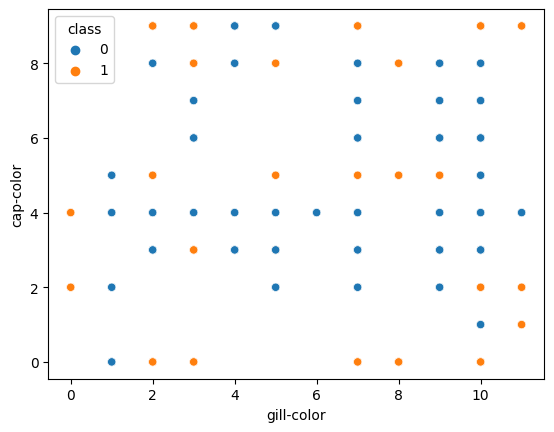

In [ ]:
sns.scatterplot(data=dataset, x='gill-color', y='cap-color', hue='class')

model trainig

In [ ]:
X = dataset[dataset.columns[1:]]
y= dataset[dataset.columns[0]]

In [ ]:
X


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
# split the dataset into training and test
from sklearn.model_selection import train_test_split

# import  accuracy_score from sklearn metrics
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [139]:
# train the model using different hyperparameters
# C parameter, a regularization parameter for the model, allow a certain degree of misclasification tolerance
# C default value is 1, you can decrease the value for more regularization, for instance if your data is very noisy
# use different kernel, the default is 'rbf', 'linear' , 'poly' and 'sigmoid'
svc_results = {}
regularization = [0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'sigmoid']

for reg in regularization:
  for kern in kernels:
    classifier = SVC(kernel=kern,C=reg)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    svc_results[f"{reg}_{kern}"] = {
        'accuracy_score': accuracy_score(y_test, y_pred),
        'Kernel':classifier
    }



In [141]:
for k, v in svc_results.items():
  print(k, v)

0.01_linear {'accuracy_score': 0.9513846153846154, 'Kernel': SVC(C=0.01, kernel='linear')}
0.01_poly {'accuracy_score': 0.931076923076923, 'Kernel': SVC(C=0.01, kernel='poly')}
0.01_sigmoid {'accuracy_score': 0.7003076923076923, 'Kernel': SVC(C=0.01, kernel='sigmoid')}
0.1_linear {'accuracy_score': 0.9458461538461539, 'Kernel': SVC(C=0.1, kernel='linear')}
0.1_poly {'accuracy_score': 0.9815384615384616, 'Kernel': SVC(C=0.1, kernel='poly')}
0.1_sigmoid {'accuracy_score': 0.5033846153846154, 'Kernel': SVC(C=0.1, kernel='sigmoid')}
1_linear {'accuracy_score': 0.976, 'Kernel': SVC(C=1, kernel='linear')}
1_poly {'accuracy_score': 0.9993846153846154, 'Kernel': SVC(C=1, kernel='poly')}
1_sigmoid {'accuracy_score': 0.4676923076923077, 'Kernel': SVC(C=1, kernel='sigmoid')}
10_linear {'accuracy_score': 0.9858461538461538, 'Kernel': SVC(C=10, kernel='linear')}
10_poly {'accuracy_score': 1.0, 'Kernel': SVC(C=10, kernel='poly')}
10_sigmoid {'accuracy_score': 0.46584615384615385, 'Kernel': SVC(C=10,